**import libraries**

In [1]:
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import utils
from glob import glob

In [2]:
import librosa as lr

**labels**

In [3]:
labels = ['اوراق', 'ارز', 'سکه', 'بانک', 'طلا', 'نفت', 'مشتقات', 'فلزات', 'صندوق سهامی', 'صندوق درآمد ثابت', 'صندوق مختلط', 'صندوق قابل معامله']

In [4]:
len(labels)

12

### **Preprocessing data**

### **Read dataset**

**read data.json**

In [5]:
!gdown --id 1-322-3NQ84fc2aM2Xg1_LsMf6H8STsZ5

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-322-3NQ84fc2aM2Xg1_LsMf6H8STsZ5
To: /content/data.json
100% 270M/270M [00:03<00:00, 85.3MB/s]


In [6]:
def load_data(data_path):
    with open(data_path, "r") as f:
        data = json.load(f)

    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    return X, y

In [7]:
X, y = load_data('data.json')

In [8]:
X.shape

(2880, 20, 300)

In [9]:

y[0:240]

array(['اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق', 'اوراق',
       'اوراق', 'اور

In [10]:
categories = pd.get_dummies(y).columns.values

In [11]:
categories

array(['ارز', 'اوراق', 'بانک', 'سکه', 'صندوق درآمد ثابت', 'صندوق سهامی',
       'صندوق قابل معامله', 'صندوق مختلط', 'طلا', 'فلزات', 'مشتقات',
       'نفت'], dtype=object)

In [12]:
y_one_hot = pd.get_dummies(y).values

In [13]:
y_one_hot

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
len(X), len(y_one_hot)

(2880, 2880)

In [15]:
def get_train_test(X, y_one_hot):
  X_train = []
  X_test = []
  Y_train = []
  Y_test = []
  counter = 0
  for i in range(len(X)):
    if (i+1) % 40 == 0:
      x_train, x_test, y_train, y_test = train_test_split(X[counter*40:(counter*40)+40], y_one_hot[counter*40:(counter*40)+40], test_size=0.3, shuffle=True, random_state=10)
      
      X_train += x_train.tolist()
      X_test += x_test.tolist()
      Y_train += y_train.tolist()
      Y_test += y_test.tolist()  

      counter += 1
  
  return np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)

In [16]:
X_train, X_test, y_train, y_test = get_train_test(X, y_one_hot)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2016, 20, 300)
(864, 20, 300)
(2016, 12)
(864, 12)


**shuffle dataset**

In [ ]:
X_train, y_train = utils.shuffle(X_train, y_train)
X_test, y_test = utils.shuffle(X_test, y_test)

**add channel**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2016, 20, 300, 1)
(864, 20, 300, 1)


### **Build Model**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(len(categories), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 19, 299, 64)       320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 10, 150, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 9, 149, 32)        8224      
                                                                 
 dropout_30 (Dropout)        (None, 9, 149, 32)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 4, 74, 32)        

In [ ]:
model.compile(
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=10)

In [ ]:
history = model.fit(
              X_train,
              y_train,
              batch_size=32,
              epochs=300,
              verbose=1,
              validation_data=(X_test, y_test),
              callbacks=[earlystop_callback]
              )

Epoch 1/300
63/63 [==============================] - 2s 15ms/step - loss: 5.3349 - accuracy: 0.0833 - val_loss: 2.5972 - val_accuracy: 0.0961
Epoch 2/300
63/63 [==============================] - 1s 11ms/step - loss: 2.8905 - accuracy: 0.1037 - val_loss: 2.5893 - val_accuracy: 0.1204
Epoch 3/300
63/63 [==============================] - 1s 11ms/step - loss: 2.7397 - accuracy: 0.0873 - val_loss: 2.5874 - val_accuracy: 0.1146
Epoch 4/300
63/63 [==============================] - 1s 12ms/step - loss: 2.6645 - accuracy: 0.0913 - val_loss: 2.5878 - val_accuracy: 0.1204
Epoch 5/300
63/63 [==============================] - 1s 12ms/step - loss: 2.6325 - accuracy: 0.1116 - val_loss: 2.5795 - val_accuracy: 0.1458
Epoch 6/300
63/63 [==============================] - 1s 12ms/step - loss: 2.6059 - accuracy: 0.1096 - val_loss: 2.5735 - val_accuracy: 0.1412
Epoch 7/300
63/63 [==============================] - 1s 12ms/step - loss: 2.5918 - accuracy: 0.1101 - val_loss: 2.5623 - val_accuracy: 0.1505
Epoch 

In [ ]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\ntest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

27/27 [==============================] - 0s 6ms/step - loss: 0.4871 - accuracy: 0.8877

test loss: 0.4871078431606293, test accuracy: 88.77314925193787


In [ ]:
model.save('model.h5')

### **Prediction**

In [17]:
from tensorflow.keras.models import load_model

**load dataset.zip**

In [18]:
!gdown --id 1--C4P9SSZhYnTITWyYpEzNXZwpOKM6tW

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1--C4P9SSZhYnTITWyYpEzNXZwpOKM6tW
To: /content/dataset.zip
100% 35.0M/35.0M [00:00<00:00, 54.9MB/s]


In [19]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/1/
  inflating: dataset/1/1-(1).mp3     
  inflating: dataset/1/10-(1).mp3    
  inflating: dataset/1/11-(1).mp3    
  inflating: dataset/1/12-(1).mp3    
  inflating: dataset/1/13-(1).mp3    
  inflating: dataset/1/14-(1).mp3    
  inflating: dataset/1/15-(1).mp3    
  inflating: dataset/1/16-(1).mp3    
  inflating: dataset/1/17-(1).mp3    
  inflating: dataset/1/18-(1).mp3    
  inflating: dataset/1/19-(1).mp3    
  inflating: dataset/1/2-(1).mp3     
  inflating: dataset/1/20-(1).mp3    
  inflating: dataset/1/21-(1).mp3    
  inflating: dataset/1/22-(1).mp3    
  inflating: dataset/1/23-(1).mp3    
  inflating: dataset/1/24-(1).mp3    
  inflating: dataset/1/25-(1).mp3    
  inflating: dataset/1/26-(1).mp3    
  inflating: dataset/1/27-(1).mp3    
  inflating: dataset/1/28-(1).mp3    
  inflating: dataset/1/29-(1).mp3    
  inflating: dataset/1/3-(1).mp3     
  inflating: dataset/1/30-(1).mp3    
  inflating: dataset

In [61]:
class Recognizer:

  def __init__(self):
    self.MAX_LEN = 300
    self.categories = ['ارز', 'اوراق', 'بانک', 'سکه', 'صندوق درآمد ثابت', 'صندوق سهامی','صندوق قابل معامله', 'صندوق مختلط', 'طلا', 'فلزات', 'مشتقات','نفت']

  def load_model(self, model_name):
    model = load_model(model_name)
    return model

  def signal2mfcc(self, file_path, max_len):
      signal, sample_rate = lr.load(file_path, mono=True, sr=None)
      mfcc = lr.feature.mfcc(signal, sample_rate)

      if (max_len > mfcc.shape[1]):
          pad_width = max_len - mfcc.shape[1]
          mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
      else:
          mfcc = mfcc[:, :max_len]
      
      return mfcc

  def prediction(self, model, audio_path):
      audio_file = glob(audio_path)
      MFCCs = self.signal2mfcc(audio_file[0], self.MAX_LEN)
      MFCCs = MFCCs.reshape(1,20,300,1)
      prediction = model.predict(MFCCs)[0]
      category_index = np.where(prediction == max(prediction))[0][0]
      result = self.categories[category_index]
      return result   


In [62]:
if __name__ == '__main__':
  recognizer = Recognizer()
  model = recognizer.load_model('model.h5')
  result = recognizer.prediction(model, '/content/dataset/9/8-(9).mp3')
  print(result)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 102ms/step
نفت


### **Confusion Matrix**

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
recognizer = Recognizer()
model = recognizer.load_model('model.h5')

In [55]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

27/27 [==============================] - 0s 4ms/step


In [58]:
y_test = np.argmax(y_test, axis=1)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        72
           1       0.86      0.85      0.85        72
           2       0.92      0.99      0.95        72
           3       0.85      0.79      0.82        72
           4       0.93      0.92      0.92        72
           5       0.93      0.89      0.91        72
           6       0.78      0.86      0.82        72
           7       0.90      0.85      0.87        72
           8       0.87      0.96      0.91        72
           9       0.93      0.93      0.93        72
          10       0.86      0.90      0.88        72
          11       0.95      0.96      0.95        72

    accuracy                           0.89       864
   macro avg       0.89      0.89      0.89       864
weighted avg       0.89      0.89      0.89       864



In [67]:
cm = confusion_matrix(y_test, y_pred)

In [60]:
cm

array([[55,  1,  1,  5,  0,  0,  6,  1,  1,  0,  2,  0],
       [ 1, 61,  1,  1,  1,  2,  0,  2,  2,  0,  1,  0],
       [ 0,  0, 71,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 57,  0,  0,  8,  0,  2,  0,  4,  0],
       [ 0,  2,  2,  0, 66,  0,  0,  0,  0,  1,  0,  1],
       [ 1,  1,  0,  0,  2, 64,  0,  3,  0,  0,  0,  1],
       [ 2,  0,  0,  2,  0,  0, 62,  0,  2,  0,  4,  0],
       [ 0,  4,  0,  0,  0,  1,  0, 61,  1,  4,  0,  1],
       [ 0,  1,  2,  0,  0,  0,  0,  0, 69,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  0,  0,  1,  1, 67,  0,  0],
       [ 1,  0,  0,  1,  0,  1,  3,  0,  0,  0, 65,  1],
       [ 0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0, 69]])

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

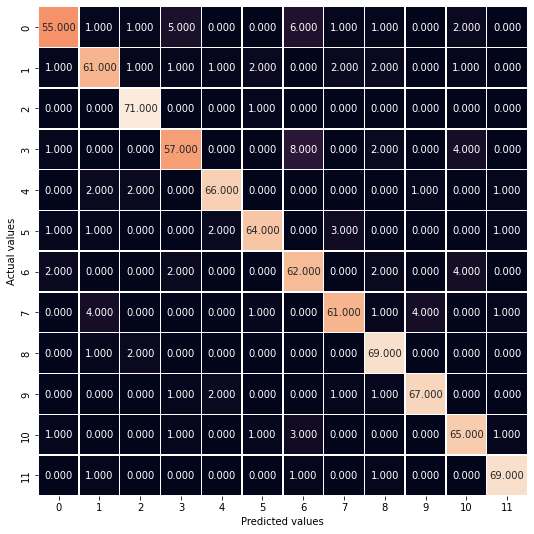

In [72]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()